## Load and Explore the Dataset

In [14]:
import pandas as pd
import numpy as np

file_path = "Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

df.head()

Dataset shape: (7043, 21)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-nul

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic Summary Statistics

In [15]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary statistics for numerical columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Uni

## Data Cleaning and Preprocessing

In [16]:
print("Unique values in TotalCharges that are not numeric:")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges'])

# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nMissing values after conversion:")
print(df.isnull().sum())

# Replace missing TotalCharges with 0 (since tenure=0 means new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("\nData types after conversion:")
print(df.dtypes)

Unique values in TotalCharges that are not numeric:
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data types after conversion:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService     

## Encode Categorical Variables

In [17]:
df = df.drop('customerID', axis=1)

binary_columns = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

replace_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

df = pd.get_dummies(df, drop_first=True)

print("Dataset shape after encoding:", df.shape)
df.head()

Dataset shape after encoding: (7043, 24)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,True,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,True,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,True,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,True,True,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


## Exploratory Data Analysis (EDA)

### Churn Distribution

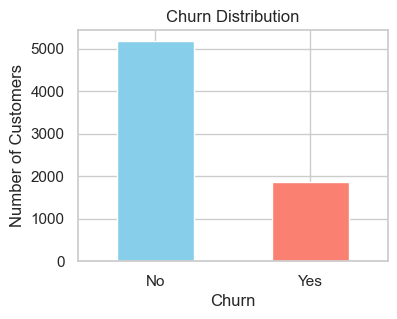

Overall churn rate: 26.54%


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(4,3))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)

plt.savefig("churn_distribution.png", dpi=150, bbox_inches='tight')

plt.show()

churn_rate = df['Churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

## Numerical Feature Comparison

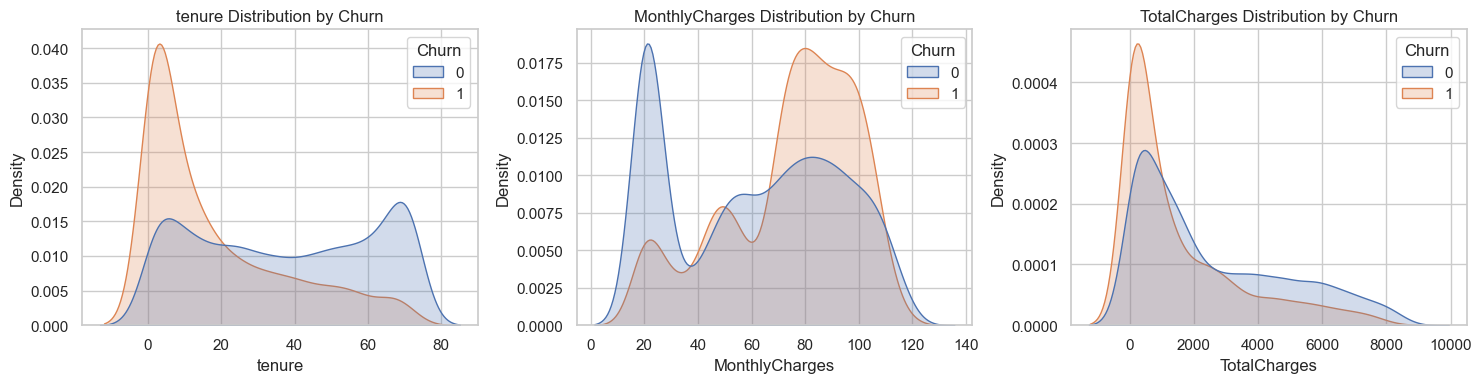

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15,4))

for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False)
    plt.title(f'{col} Distribution by Churn')

plt.tight_layout()

plt.savefig("num_features_distribution.png", dpi=300, bbox_inches='tight')

plt.show()

## Categorical Feature Comparison

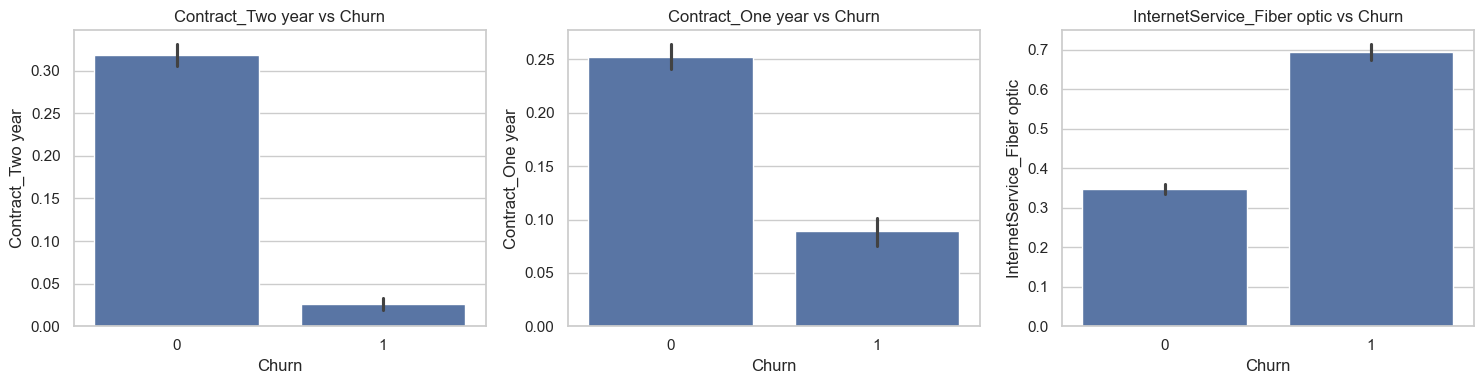

In [21]:
cat_features = ['Contract_Two year', 'Contract_One year', 'InternetService_Fiber optic']

plt.figure(figsize=(15,4))

for i, col in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')

plt.tight_layout()

plt.savefig("cat_features_vs_churn.png", dpi=300, bbox_inches='tight')

plt.show()

## Train-Test Split and Preprocessing Pipeline

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

X_train[numeric_features] = preprocessor.fit_transform(X_train[numeric_features])
X_test[numeric_features] = preprocessor.transform(X_test[numeric_features])

Training set shape: (5282, 23)
Test set shape: (1761, 23)


## Train Baseline Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\nRandom Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.52      0.80      0.63       467

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761

ROC AUC: 0.8462728653743683
Confusion Matrix:
 [[950 344]
 [ 95 372]]

Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.48      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761

ROC AUC: 0.8291720310178091
Confusion Matrix:
 [[1167  127]
 [ 244  223]]


## Improving Recall

### Adjust Classification Threshold

In [24]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

# Predict probabilities using Logistic Regression
y_prob_lr = logreg.predict_proba(X_test)[:,1]

# Try a lower threshold
threshold = 0.3
y_pred_threshold = (y_prob_lr >= threshold).astype(int)

print("Logistic Regression with threshold =", threshold)
print("Recall:", recall_score(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("F1-score:", f1_score(y_test, y_pred_threshold))

Logistic Regression with threshold = 0.3
Recall: 0.9271948608137045
Precision: 0.43517587939698493
F1-score: 0.5923392612859097


### SMOTE Oversampling

In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Training set before SMOTE:", X_train.shape, y_train.value_counts())
print("Training set after SMOTE:", X_train_res.shape, pd.Series(y_train_res).value_counts())

# Train Random Forest on resampled data
rf_res = RandomForestClassifier(n_estimators=200, random_state=42)
rf_res.fit(X_train_res, y_train_res)

# Evaluate on test set
y_pred_rf_res = rf_res.predict(X_test)
y_prob_rf_res = rf_res.predict_proba(X_test)[:,1]

print("\nRandom Forest after SMOTE")
print("Recall:", recall_score(y_test, y_pred_rf_res))
print("Precision:", precision_score(y_test, y_pred_rf_res))
print("F1-score:", f1_score(y_test, y_pred_rf_res))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_res))

Training set before SMOTE: (5282, 23) Churn
0    3880
1    1402
Name: count, dtype: int64
Training set after SMOTE: (7760, 23) Churn
0    3880
1    3880
Name: count, dtype: int64

Random Forest after SMOTE
Recall: 0.6188436830835118
Precision: 0.5557692307692308
F1-score: 0.585612968591692
ROC AUC: 0.8239610258514839


## Feature Importance Analysis

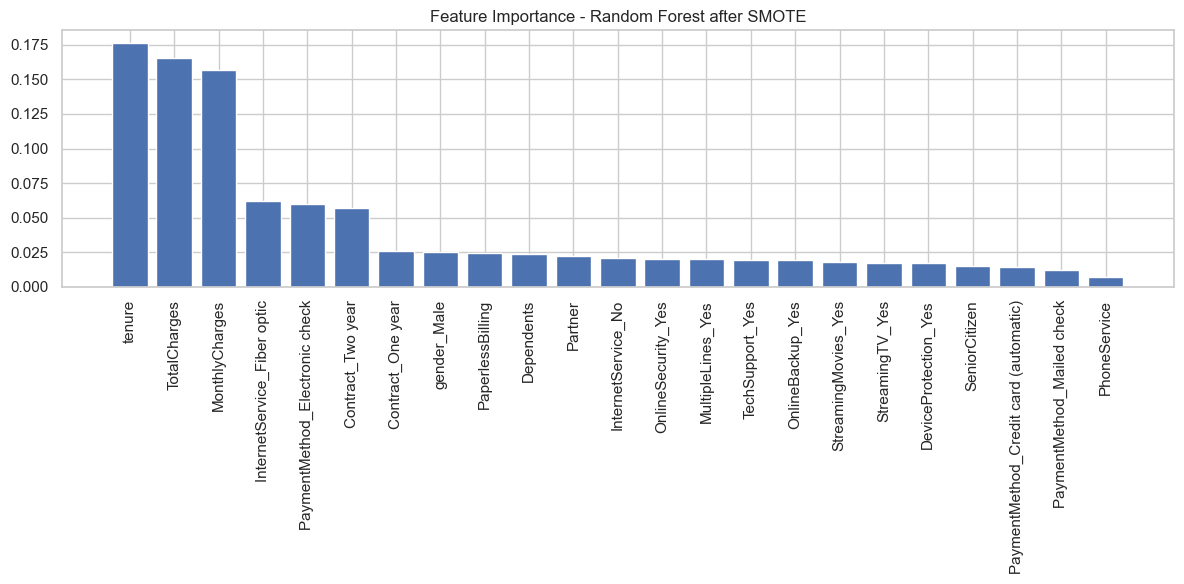

In [26]:
import matplotlib.pyplot as plt

# Feature importance
importances = rf_res.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest after SMOTE")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()

plt.savefig("feature_importance_rf_smote.png", dpi=300, bbox_inches='tight')

plt.show()